<a href="https://colab.research.google.com/github/Aeraku/Aeraku/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the main objectives and questions that you want to address with your analysis
We want to observe where immigrants from top remittance receiving countries settle when they enter the US and become legal permanent residents. We are analyzing data from USCIC between 2017_2021 for the top 6 countries that have been receiving the most remittances. We will use this data to suggest to digital remittance companies where (states) they should set up.

In [1]:
#IMPORTING THE DATA INTO OUR ANALYSIS ENVIRONMENT. We used the name of the country and year of immigration.

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

phillipines17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Phillipines17.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, Let us take a peak at one of the files

In [2]:
phillipines17.head(15)

#we see the dataset has subsets of data grouped into other characteristics. We notice row index 4 is what we can aim to use as our dataset columns.

,Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,by Region/Country of Birth and Selected Charac...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Region/Country: Philippines,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Characteristic,Total,Female,Male,Unknown
5,Total,"49,147","30,512","18,634",1
6,NaN,NaN,NaN,NaN,NaN
7,New arrivals,"31,201","18,191","13,009",1
8,Adjustments of status,"17,946","12,321","5,625",-
9,NaN,NaN,NaN,NaN,NaN


In [3]:
unique_values = phillipines17['Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017'].unique()
unique_values

#what unique values exist in Column 1

array(['by Region/Country of Birth and Selected Characteristics', nan,
       'Region/Country: Philippines', 'Characteristic', 'Total',
       'New arrivals', 'Adjustments of status', 'Age', 'Under 18 years',
       '18 to 24 years', '25 to 34 years', '35 to 44 years',
       '45 to 54 years', '55 to 64 years', '65 years and over', 'Unknown',
       'Marital status', 'Married', 'Single', 'Other', 'Occupation',
       'Management, professional, and related occupations',
       'Service occupations', 'Sales and office occupations',
       'Farming, fishing, and forestry occupations',
       'Construction, extraction, maintenance and repair occupations',
       'Production, transportation, and material moving occupations',
       'Military', 'No occupation/not working outside home', 'Homemakers',
       'Students or children', 'Retirees', 'Unemployed',
       'Broad class of admission', 'Immediate relatives of U.S. citizens',
       'Family-sponsored preferences', 'Employment-based prefer

In [4]:
phillipines17.tail(30)
#here we see the data we want to get from this dataset begins from row 49 to 70. 

,Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
44,Employment-based preferences,"9,341","4,921","4,420",-
45,Diversity,5,5,-,-
46,Refugees and asylees,22,17,5,-
47,Other,600,299,301,-
48,NaN,NaN,NaN,NaN,NaN
49,Leading states/territories of residence,NaN,NaN,NaN,NaN
50,Arizona,758,509,249,-
51,California,"16,357","9,760","6,597",-
52,Colorado,309,237,72,-
53,Florida,"2,562","1,624",938,-


In [5]:
#Each dataset has about 74 rows and 5 columns. We display a summary of the DataFrame, including the data types of each column and the number of non-null values.

phillipines17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017  66 non-null     object
 1   Unnamed: 1                                                                  56 non-null     object
 2   Unnamed: 2                                                                  56 non-null     object
 3   Unnamed: 3                                                                  56 non-null     object
 4   Unnamed: 4                                                                  56 non-null     object
dtypes: object(5)
memory usage: 3.0+ KB


In [6]:
phillipines17.columns

Index(['Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

In [7]:
phillipines17.dtypes

#given the subsets of data in our dataset we can't plot the values until we have cleaned it up.

Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017    object
Unnamed: 1                                                                    object
Unnamed: 2                                                                    object
Unnamed: 3                                                                    object
Unnamed: 4                                                                    object
dtype: object

In [8]:
phillipines17.isnull().sum()

#curious the number of null values in each column of the DataFrame. 

Persons Obtaining Lawful Permanent Resident Status During Fiscal Year 2017     8
Unnamed: 1                                                                    18
Unnamed: 2                                                                    18
Unnamed: 3                                                                    18
Unnamed: 4                                                                    18
dtype: int64

In [9]:
#to analyse the data we'll need to pull out the subsets of data independently and assign a year to the different data sets
#we will store the subsets inside the data frames as separate Pandas dataframe.
#for the phillipines 2021 dataset for example we will save the subsets of occupation, age, marital status, residing states of immigrants into different subsets titled
#phillipines_class2021, phillipines_occupation2021, phillipines_age2021,phillipines_states2021,phillipines_marital2021
#the dataset we are mostly interested in is phillipines_states2021

china21=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/China21.csv')
egypt21=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Egypt21.csv')
india21=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/India21.csv')
mexico21=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Mexico21.csv')
nigeria21=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Nigeria21.csv')
phillipines21=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Phillipines21.csv')

china21 = china21.assign(year=2021)
egypt21=egypt21.assign(year=2021)
india21=india21.assign(year=2021)
mexico21=mexico21.assign(year=2021)
nigeria21=nigeria21.assign(year=2021)
phillipines21=phillipines21.assign(year=2021)

china20=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/China20.csv')
egypt20=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Egypt20.csv')
india20=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/India20.csv')
mexico20=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Mexico20.csv')
nigeria20=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Nigeria20.csv')
phillipines20=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Phillipines20.csv')

china20 = china20.assign(year=2020)
egypt20=egypt20.assign(year=2020)
india20=india20.assign(year=2020)
mexico20=mexico20.assign(year=2020)
nigeria20=nigeria20.assign(year=2020)
phillipines20=phillipines20.assign(year=2020)

china19=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/China19.csv')
egypt19=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Egypt19.csv')
india19=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/India19.csv')
mexico19=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Mexico19.csv')
nigeria19=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Nigeria19.csv')
phillipines19=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Phillipines19.csv')

china19 = china19.assign(year=2019)
egypt19=egypt19.assign(year=2019)
india19=india19.assign(year=2019)
mexico19=mexico19.assign(year=2019)
nigeria19=nigeria19.assign(year=2019)
phillipines19=phillipines19.assign(year=2019)

china18=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/China18.csv')
egypt18=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Egypt18.csv')
india18=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/India18.csv')
mexico18=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Mexico18.csv')
nigeria18=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Nigeria18.csv')
phillipines18=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Phillipines18.csv')

china18 = china18.assign(year=2018)
egypt18=egypt18.assign(year=2018)
india18=india18.assign(year=2018)
mexico18=mexico18.assign(year=2018)
nigeria18=nigeria18.assign(year=2018)
phillipines18=phillipines18.assign(year=2018)

china17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/China17.csv')
egypt17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Egypt17.csv')
india17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/India17.csv')
mexico17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Mexico17.csv')
nigeria17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Nigeria17.csv')
phillipines17=pd.read_csv('/content/drive/MyDrive/DS4A Project/Review by the top countries selected/Phillipines17.csv')

china17 = china17.assign(year=2017)
egypt17=egypt17.assign(year=2017)
india17=india17.assign(year=2017)
mexico17=mexico17.assign(year=2017)
nigeria17=nigeria17.assign(year=2017)
phillipines17=phillipines17.assign(year=2017)

#PHILLIPINES DATA FROM 2017-2021
dataframes = [phillipines21,phillipines20, phillipines19, phillipines18, phillipines17]
years = ['21','20', '19','18','17']

states= []

for df, year in zip(dataframes, years):
  df = df.iloc[49:70, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(49)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  states.append(df)

# Now the modified dataframes are stored in the list
states[0]  # This is the modified phillipines20 dataframe
states[1]  # This is the modified phillipines19 dataframe
states[2]
states[3]
states[4]

phillipines_states2021 =states[0]
phillipines_states2020=states[1]
phillipines_states2019=states[2]
phillipines_states2018=states[3]
phillipines_states2017=states[4]


#age data

age = []

for df, year in zip(dataframes, years):
  df = df.iloc[10:18, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(10)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  age.append(df)

age[0]
age[1] 
age[2]
age[3]
age[4]

phillipines_age2021 = age[0]
phillipines_age2020= age[1]
phillipines_age2019= age[2]
phillipines_age2018= age[3]
phillipines_age2017= age[4]

#class of admission
class_of_admission = []
for df, year in zip(dataframes, years):
  df = df.iloc[41:47, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(41)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  class_of_admission.append(df)

class_of_admission [0]
class_of_admission [1] 
class_of_admission [2]
class_of_admission [3]
class_of_admission [4]

phillipines_class2021 = class_of_admission [0]
phillipines_class2020= class_of_admission [1] 
phillipines_class2019= class_of_admission [2]
phillipines_class2018= class_of_admission [3]
phillipines_class2017= class_of_admission [4]


#marital status
marital_status = []
for df, year in zip(dataframes, years):
  df = df.iloc[20:25, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(20)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  marital_status.append(df)

marital_status [0]
marital_status [1] 
marital_status [2]
marital_status [3]
marital_status [4]

phillipines_marital2021 = marital_status [0]
phillipines_marital2020= marital_status [1]  
phillipines_marital2019= marital_status [2]
phillipines_marital2018= marital_status [3]
phillipines_marital2017= marital_status [4]

#occupation
occupation= []
for df, year in zip(dataframes, years):
  df = df.iloc[26:39, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(26)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  occupation.append(df)

occupation [0]
occupation [1] 
occupation [2]
occupation [3]
occupation [4] 

phillipines_occupation2021 = occupation [0]
phillipines_occupation2020= occupation [1]  
phillipines_occupation2019= occupation[2]
phillipines_occupation2018= occupation[3]
phillipines_occupation2017= occupation[4]




In [10]:
#we've created the dataframes from the subsets. we will view the one on occupation here

phillipines_occupation2017

,Leading states,Total,Female,Male,Unknown,Year
27,"Management, professional, and related occupations",5940,3811,2129,0,2017-01-01
28,Service occupations,842,492,350,0,2017-01-01
29,Sales and office occupations,1553,884,669,0,2017-01-01
30,"Farming, fishing, and forestry occupations",354,46,308,0,2017-01-01
31,"Construction, extraction, maintenance and repa...",83,3,80,0,2017-01-01
32,"Production, transportation, and material movin...",210,77,133,0,2017-01-01
33,Military,0,0,0,0,2017-01-01
34,No occupation/not working outside home,26485,16433,10051,1,2017-01-01
35,Homemakers,4737,4513,224,0,2017-01-01
36,Students or children,12440,6109,6330,1,2017-01-01


In [11]:
#we've created the dataframes from the subsets. we will view the one on states here

phillipines_states2017

,Leading states,Total,Female,Male,Unknown,Year
50,Arizona,758,509,249,0,2017-01-01
51,California,16357,9760,6597,0,2017-01-01
52,Colorado,309,237,72,0,2017-01-01
53,Florida,2562,1624,938,0,2017-01-01
54,Georgia,544,367,177,0,2017-01-01
55,Illinois,1915,1129,786,0,2017-01-01
56,Maryland,1061,647,414,0,2017-01-01
57,Massachusetts,344,231,113,0,2017-01-01
58,Michigan,541,372,169,0,2017-01-01
59,Minnesota,319,204,115,0,2017-01-01


In [12]:

#NIGERIA DATA FROM 2017-2021
dataframes = [nigeria21,nigeria20, nigeria19, nigeria18, nigeria17]
years = ['21','20', '19','18','17']

ngstates= []

for df, year in zip(dataframes, years):
  df = df.iloc[49:70, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(49)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  ngstates.append(df)

# Now the modified dataframes are stored in the list
ngstates[0]  # This is the modified phillipines20 dataframe
ngstates[1]  # This is the modified phillipines19 dataframe
ngstates[2]
ngstates[3]
ngstates[4]

nigeria_states2021 =ngstates[0]
nigeria_states2020=ngstates[1]
nigeria_states2019=ngstates[2]
nigeria_states2018=ngstates[3]
nigeria_states2017=ngstates[4]

#age data

ngage = []

for df, year in zip(dataframes, years):
  df = df.iloc[10:18, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(10)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  ngage.append(df)

ngage[0]
ngage[1] 
ngage[2]
ngage[3]
ngage[4]

nigeria_age2021 = ngage[0]
nigeria_age2020= ngage[1]
nigeria_age2019= ngage[2]
nigeria_age2018= ngage[3]
nigeria_age2017= ngage[4]

#class of admission
ngclass_of_admission = []
for df, year in zip(dataframes, years):
  df = df.iloc[41:47, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(41)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  ngclass_of_admission.append(df)

ngclass_of_admission [0]
ngclass_of_admission [1] 
ngclass_of_admission [2]
ngclass_of_admission [3]
ngclass_of_admission [4]

nigeria_class2021 = ngclass_of_admission [0]
nigeria_class2020= ngclass_of_admission [1] 
nigeria_class2019= ngclass_of_admission [2]
nigeria_class2018= ngclass_of_admission [3]
nigeria_class2017= ngclass_of_admission [4]


#marital status
ngmarital_status = []
for df, year in zip(dataframes, years):
  df = df.iloc[20:25, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(20)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  ngmarital_status.append(df)

ngmarital_status [0]
ngmarital_status [1] 
ngmarital_status [2]
ngmarital_status [3]
ngmarital_status [4]

nigeria_marital2021 = ngmarital_status [0]
nigeria_marital2020= ngmarital_status [1]  
nigeria_marital2019= ngmarital_status [2]
nigeria_marital2018= ngmarital_status [3]
nigeria_marital2017= ngmarital_status [4]

#occupation
ngoccupation= []
for df, year in zip(dataframes, years):
  df = df.iloc[26:39, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(26)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  ngoccupation.append(df)

ngoccupation [0]
ngoccupation [1] 
ngoccupation [2]
ngoccupation [3]
ngoccupation [4] 

nigeria_occupation2021 = ngoccupation [0]
nigeria_occupation2020= ngoccupation [1]  
nigeria_occupation2019= ngoccupation[2]
nigeria_occupation2018= ngoccupation[3]
nigeria_occupation2017= ngoccupation[4]

In [13]:
nigeria_states2021 

,Leading states,Total,Female,Male,Unknown,Year
50,Arizona,135,57,78,0,2021-01-01
51,California,898,472,426,0,2021-01-01
52,Colorado,80,34,46,0,2021-01-01
53,Connecticut,100,39,61,0,2021-01-01
54,Florida,348,157,191,0,2021-01-01
55,Georgia,1133,556,577,0,2021-01-01
56,Illinois,606,302,304,0,2021-01-01
57,Maryland,1370,669,701,0,2021-01-01
58,Massachusetts,313,151,162,0,2021-01-01
59,Michigan,193,88,105,0,2021-01-01


In [14]:

#MEXICO DATA FROM 2017-2021
dataframes = [mexico21,mexico20, mexico19, mexico18, mexico17]
years = ['21','20', '19','18','17']

mcstates= []

for df, year in zip(dataframes, years):
  df = df.iloc[49:70, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(49)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  mcstates.append(df)

# Now the modified dataframes are stored in the list
mcstates[0]  # This is the modified phillipines20 dataframe
mcstates[1]  # This is the modified phillipines19 dataframe
mcstates[2]
mcstates[3]
mcstates[4]

mexico_states2021 =mcstates[0]
mexico_states2020=mcstates[1]
mexico_states2019=mcstates[2]
mexico_states2018=mcstates[3]
mexico_states2017=mcstates[4]

#age data

mcage = []

for df, year in zip(dataframes, years):
  df = df.iloc[10:18, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(10)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  mcage.append(df)

mcage[0]
mcage[1] 
mcage[2]
mcage[3]
mcage[4]

mexico_age2021 = mcage[0]
mexico_age2020= mcage[1]
mexico_age2019= mcage[2]
mexico_age2018= mcage[3]
mexico_age2017= mcage[4]

#class of admission
mcclass_of_admission = []
for df, year in zip(dataframes, years):
  df = df.iloc[41:47, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(41)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  mcclass_of_admission.append(df)

mcclass_of_admission [0]
mcclass_of_admission [1] 
mcclass_of_admission [2]
mcclass_of_admission [3]
mcclass_of_admission [4]

mexico_class2021 = mcclass_of_admission [0]
mexico_class2020= mcclass_of_admission [1] 
mexico_class2019= mcclass_of_admission [2]
mexico_class2018= mcclass_of_admission [3]
mexico_class2017= mcclass_of_admission [4]


#marital status
mcmarital_status = []
for df, year in zip(dataframes, years):
  df = df.iloc[20:25, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(20)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  mcmarital_status.append(df)

mcmarital_status [0]
mcmarital_status [1] 
mcmarital_status [2]
mcmarital_status [3]
mcmarital_status [4]

mexico_marital2021 = mcmarital_status [0]
mexico_marital2020= mcmarital_status [1]  
mexico_marital2019= mcmarital_status [2]
mexico_marital2018= mcmarital_status [3]
mexico_marital2017= mcmarital_status [4]

#occupation
mcoccupation= []
for df, year in zip(dataframes, years):
  df = df.iloc[26:39, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(26)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  mcoccupation.append(df)

mcoccupation [0]
mcoccupation [1] 
mcoccupation [2]
mcoccupation [3]
mcoccupation [4] 

mexico_occupation2021 = mcoccupation [0]
mexico_occupation2020= mcoccupation [1]  
mexico_occupation2019= mcoccupation[2]
mexico_occupation2018= mcoccupation[3]
mexico_occupation2017= mcoccupation[4]

In [15]:
mexico_occupation2017

,Leading states,Total,Female,Male,Unknown,Year
27,"Management, professional, and related occupations",6976,2903,4073,0,2017-01-01
28,Service occupations,6657,2937,3720,0,2017-01-01
29,Sales and office occupations,4920,2386,2534,0,2017-01-01
30,"Farming, fishing, and forestry occupations",4041,469,3572,0,2017-01-01
31,"Construction, extraction, maintenance and repa...",6189,81,6108,0,2017-01-01
32,"Production, transportation, and material movin...",19414,3037,16377,0,2017-01-01
33,Military,3,0,3,0,2017-01-01
34,No occupation/not working outside home,71631,52541,19088,2,2017-01-01
35,Homemakers,38617,35917,2699,1,2017-01-01
36,Students or children,26985,13214,13770,1,2017-01-01


In [16]:

#INDIA DATA FROM 2017-2021
dataframes = [india21,india20, india19, india18, india17]
years = ['21','20', '19','18','17']

instates= []

for df, year in zip(dataframes, years):
  df = df.iloc[49:70, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(49)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  instates.append(df)

# Now the modified dataframes are stored in the list
instates[0]  # This is the modified phillipines20 dataframe
instates[1]  # This is the modified phillipines19 dataframe
instates[2]
instates[3]
instates[4]

india_states2021 =instates[0]
india_states2020=instates[1]
india_states2019=instates[2]
india_states2018=instates[3]
india_states2017=instates[4]

#age data

inage = []

for df, year in zip(dataframes, years):
  df = df.iloc[10:18, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(10)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  inage.append(df)

inage[0]
inage[1] 
inage[2]
inage[3]
inage[4]

india_age2021 = inage[0]
india_age2020= inage[1]
india_age2019= inage[2]
india_age2018= inage[3]
india_age2017= inage[4]

#class of admission
inclass_of_admission = []
for df, year in zip(dataframes, years):
  df = df.iloc[41:47, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(41)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  inclass_of_admission.append(df)

inclass_of_admission [0]
inclass_of_admission [1] 
inclass_of_admission [2]
inclass_of_admission [3]
inclass_of_admission [4]

india_class2021 = inclass_of_admission [0]
india_class2020= inclass_of_admission [1] 
india_class2019= inclass_of_admission [2]
india_class2018= inclass_of_admission [3]
india_class2017= inclass_of_admission [4]


#marital status
inmarital_status = []
for df, year in zip(dataframes, years):
  df = df.iloc[20:25, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(20)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  inmarital_status.append(df)

inmarital_status [0]
inmarital_status [1] 
inmarital_status [2]
inmarital_status [3]
inmarital_status [4]

india_marital2021 = inmarital_status [0]
india_marital2020= inmarital_status [1]  
india_marital2019= inmarital_status [2]
india_marital2018= inmarital_status [3]
india_marital2017= inmarital_status [4]

#occupation
inoccupation= []
for df, year in zip(dataframes, years):
  df = df.iloc[26:39, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(26)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  inoccupation.append(df)

inoccupation [0]
inoccupation [1] 
inoccupation [2]
inoccupation [3]
inoccupation [4] 

india_occupation2021 = inoccupation [0]
india_occupation2020= inoccupation [1]  
india_occupation2019= inoccupation[2]
india_occupation2018= inoccupation[3]
india_occupation2017= inoccupation[4]

In [17]:

#CHINA DATA FROM 2017-2021
dataframes = [china21,china20, china19, china18, china17]
years = ['21','20', '19','18','17']

chstates= []

for df, year in zip(dataframes, years):
  df = df.iloc[49:70, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(49)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  chstates.append(df)

# Now the modified dataframes are stored in the list
chstates[0]  # This is the modified phillipines20 dataframe
chstates[1]  # This is the modified phillipines19 dataframe
chstates[2]
chstates[3]
chstates[4]

china_states2021 =chstates[0]
china_states2020=chstates[1]
china_states2019=chstates[2]
china_states2018=chstates[3]
china_states2017=chstates[4]

#age data

chage = []

for df, year in zip(dataframes, years):
  df = df.iloc[10:18, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(10)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  chage.append(df)

chage[0]
chage[1] 
chage[2]
chage[3]
chage[4]

china_age2021 = chage[0]
china_age2020= chage[1]
china_age2019= chage[2]
china_age2018= chage[3]
china_age2017= chage[4]

#class of admission
chclass_of_admission = []
for df, year in zip(dataframes, years):
  df = df.iloc[41:47, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(41)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  chclass_of_admission.append(df)

chclass_of_admission [0]
chclass_of_admission [1] 
chclass_of_admission [2]
chclass_of_admission [3]
chclass_of_admission [4]

china_class2021 = chclass_of_admission [0]
china_class2020= chclass_of_admission [1] 
china_class2019= chclass_of_admission [2]
china_class2018= chclass_of_admission [3]
china_class2017= chclass_of_admission [4]


#marital status
chmarital_status = []
for df, year in zip(dataframes, years):
  df = df.iloc[20:25, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(20)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  chmarital_status.append(df)

chmarital_status [0]
chmarital_status [1] 
chmarital_status [2]
chmarital_status [3]
chmarital_status [4]

china_marital2021 = chmarital_status [0]
china_marital2020= chmarital_status [1]  
china_marital2019= chmarital_status [2]
china_marital2018= chmarital_status [3]
china_marital2017= chmarital_status [4]

#occupation
choccupation= []
for df, year in zip(dataframes, years):
  df = df.iloc[26:39, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(26)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  choccupation.append(df)

choccupation [0]
choccupation [1] 
choccupation [2]
choccupation [3]
choccupation [4] 

china_occupation2021 = choccupation [0]
china_occupation2020= choccupation [1]  
china_occupation2019= choccupation[2]
china_occupation2018= choccupation[3]
china_occupation2017= choccupation[4]

In [18]:

#EGYPT DATA FROM 2017-2021
dataframes = [egypt21,egypt20, egypt19, egypt18, egypt17]
years = ['21','20', '19','18','17']

egstates= []

for df, year in zip(dataframes, years):
  df = df.iloc[49:70, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(49)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  egstates.append(df)

# Now the modified dataframes are stored in the list
egstates[0]  # This is the modified phillipines20 dataframe
egstates[1]  # This is the modified phillipines19 dataframe
egstates[2]
egstates[3]
egstates[4]

egypt_states2021 =egstates[0]
egypt_states2020=egstates[1]
egypt_states2019=egstates[2]
egypt_states2018=egstates[3]
egypt_states2017=egstates[4]

#age data

egage = []

for df, year in zip(dataframes, years):
  df = df.iloc[10:18, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(10)
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  egage.append(df)

egage[0]
egage[1] 
egage[2]
egage[3]
egage[4]

egypt_age2021 = egage[0]
egypt_age2020= egage[1]
egypt_age2019= egage[2]
egypt_age2018= egage[3]
egypt_age2017= egage[4]

#class of admission
egclass_of_admission = []
for df, year in zip(dataframes, years):
  df = df.iloc[41:47, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(41)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  egclass_of_admission.append(df)

egclass_of_admission [0]
egclass_of_admission [1] 
egclass_of_admission [2]
egclass_of_admission [3]
egclass_of_admission [4]

egypt_class2021 = egclass_of_admission [0]
egypt_class2020= egclass_of_admission [1] 
egypt_class2019= egclass_of_admission [2]
egypt_class2018= egclass_of_admission [3]
egypt_class2017= egclass_of_admission [4]


#marital status
egmarital_status = []
for df, year in zip(dataframes, years):
  df = df.iloc[20:25, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(20)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  egmarital_status.append(df)

egmarital_status [0]
egmarital_status [1] 
egmarital_status [2]
egmarital_status [3]
egmarital_status [4]

egypt_marital2021 = egmarital_status [0]
egypt_marital2020= egmarital_status [1]  
egypt_marital2019= egmarital_status [2]
egypt_marital2018= egmarital_status [3]
egypt_marital2017= egmarital_status [4]

#occupation
egoccupation= []
for df, year in zip(dataframes, years):
  df = df.iloc[26:39, :]
  df.columns = df.iloc[0]
  df.columns=['Leading states', 'Total', 'Female', 'Male', 'Unknown','Year']
  df = df.replace('-', '0')
  df['Year'] = f'20{year}'
  df=df.drop(26)
  df=df.replace('D', '')
  df['Total'] = pd.to_numeric(df['Total'].str.replace(',', ''))
  df['Female'] = pd.to_numeric(df['Female'].str.replace(',', ''))
  df['Male'] = pd.to_numeric(df['Male'].str.replace(',', ''))
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')
  df['Unknown'] = pd.to_numeric(df['Unknown'].str.replace(',', ''))
  egoccupation.append(df)

egoccupation [0]
egoccupation [1] 
egoccupation [2]
egoccupation [3]
egoccupation [4] 

egypt_occupation2021 = egoccupation [0]
egypt_occupation2020= egoccupation [1]  
egypt_occupation2019= egoccupation[2]
egypt_occupation2018= egoccupation[3]
egypt_occupation2017= egoccupation[4]

In [19]:
egypt_occupation2017.dtypes

Leading states            object
Total                      int64
Female                   float64
Male                     float64
Unknown                    int64
Year              datetime64[ns]
dtype: object

In [20]:
#we will now join the dataframes to be able to plot
import pandas as pd

# Create a list of the dataframes you want to merge
dataframes = [phillipines_states2017, phillipines_states2018, phillipines_states2019, 
              phillipines_states2020, phillipines_states2021]

# Use pd.concat to merge the dataframes
phillipines_states17_21= pd.concat(dataframes)

data2= [egypt_states2021, egypt_states2020, egypt_states2019, egypt_states2018, egypt_states2017]
egypt_states17_21= pd.concat(data2)

data3=[nigeria_states2021, nigeria_states2020, nigeria_states2019, nigeria_states2018, nigeria_states2017]
nigeria_states17_21= pd.concat(data3)

data4= [china_states2021, china_states2020, china_states2019, china_states2018, china_states2017]
china_states17_21= pd.concat(data4)

data5=[india_states2021, india_states2020, india_states2019, india_states2018, india_states2017]
india_states17_21= pd.concat(data5)

data6=[mexico_states2021, mexico_states2020, mexico_states2019, mexico_states2018, mexico_states2017]
mexico_states17_21= pd.concat(data6)

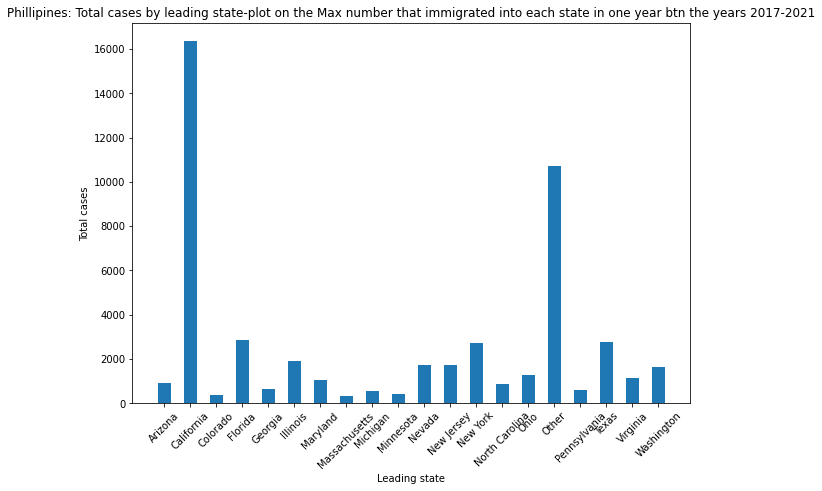

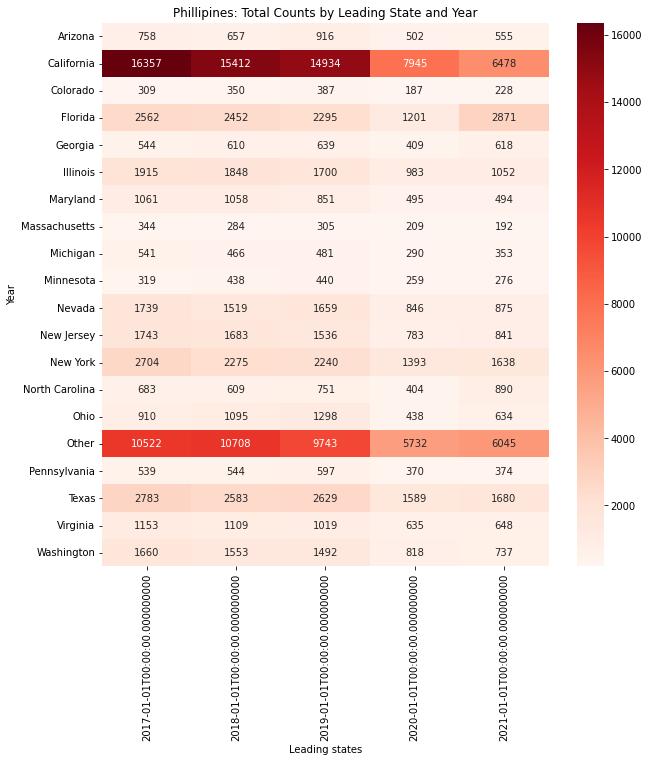

In [21]:
import plotly.express as px

fig = px.bar(
    phillipines_states17_21.query("Year==2017"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-PHILLIPINES:Total cases by leading states in 2017"  # chart title
)
fig.show()


fig = px.bar(
    phillipines_states17_21.query("Year==2018"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-PHILLIPINES:Total cases by leading states in 2018"  # chart title
)
fig.show()

fig = px.bar(
    phillipines_states17_21.query("Year==2019"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-PHILLIPINES:Total cases by leading states in 2019"  # chart title
)
fig.show()

fig = px.bar(
    phillipines_states17_21.query("Year==2020"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-PHILLIPINES:Total cases by leading states in 2020"  # chart title
)
fig.show()

fig = px.bar(
    phillipines_states17_21.query("Year==2021"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-PHILLIPINES:Total cases by leading states in 2021"  # chart title
)
fig.show()

import plotly.express as px

fig = px.line(
    phillipines_states17_21,  # data frame
    x="Year",  # column that contains the dates
    y="Total",  # column that contains the values
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-PHILLIPINES: Total cases by leading states over time"  # chart title
)
fig.show()

grouped_phillipines = phillipines_states17_21.groupby(['Leading states', 'Year'])['Total'].max()
grouped_phillipines


grouped_phillipinesdf=grouped_phillipines.reset_index()
pd.set_option('display.max_rows', 100)
grouped_phillipinesdf

import matplotlib.pyplot as plt

# Extract the leading states and total values from the dataframe
states = grouped_phillipinesdf['Leading states']
totals = grouped_phillipinesdf['Total']

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
plt.bar(states, totals, width=0.5)
# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)


# Add title and labels
plt.title('Phillipines: Total cases by leading state-plot on the Max number that immigrated into each state in one year btn the years 2017-2021')
plt.xlabel('Leading state')
plt.ylabel('Total cases')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
grouped_phillipines = grouped_phillipines.unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(grouped_phillipines, cmap='Reds', annot=True, fmt='.0f')

# Add a title and axis labels
plt.title('Phillipines: Total Counts by Leading State and Year')
plt.xlabel('Leading states')
plt.ylabel('Year')

# Show the plot
plt.show()

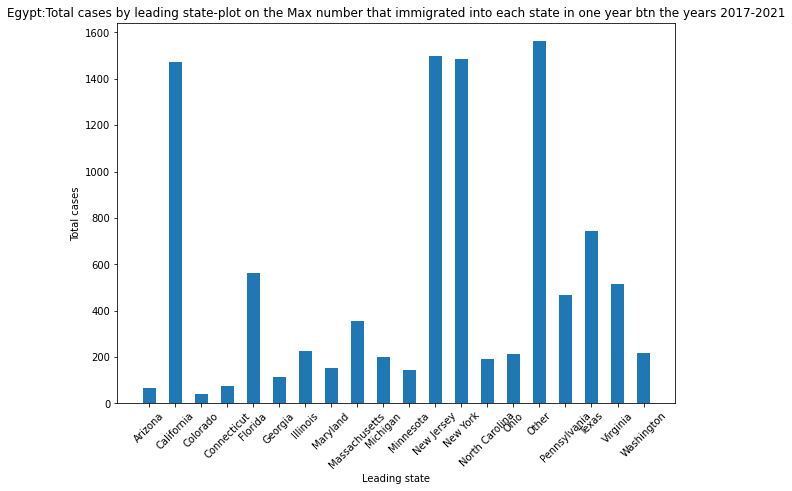

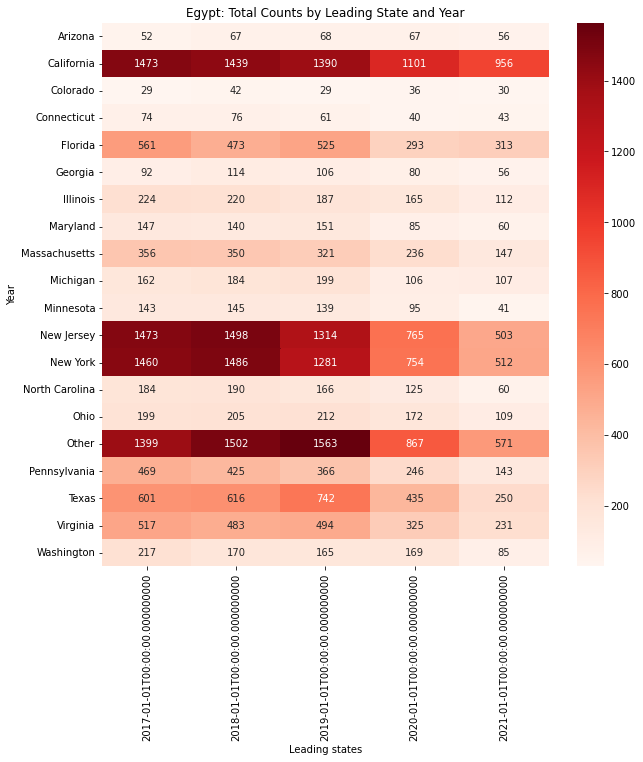

In [22]:
fig = px.bar(
    egypt_states17_21.query("Year==2017"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-EGYPT:Total cases by leading states in 2017"  # chart title
)
fig.show()


fig = px.bar(
    egypt_states17_21.query("Year==2018"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-EGYPT:Total cases by leading states in 2018"  # chart title
)
fig.show()

fig = px.bar(
    egypt_states17_21.query("Year==2019"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-EGYPT:Total cases by leading states in 2019"  # chart title
)
fig.show()

fig = px.bar(
    egypt_states17_21.query("Year==2020"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-EGYPT:Total cases by leading states in 2020"  # chart title
)
fig.show()

fig = px.bar(
    egypt_states17_21.query("Year==2021"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-EGYPT:Total cases by leading states in 2021"  # chart title
)
fig.show()

import plotly.express as px

fig = px.line(
    egypt_states17_21,  # data frame
    x="Year",  # column that contains the dates
    y="Total",  # column that contains the values
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-EGYPT: Total cases by leading states over time"  # chart title
)
fig.show()

grouped_egypt = egypt_states17_21.groupby(['Leading states', 'Year'])['Total'].max()
grouped_egypt

grouped_egyptdf=grouped_egypt.reset_index()
pd.set_option('display.max_rows', 100)
grouped_egyptdf

import matplotlib.pyplot as plt

# Extract the leading states and total values from the dataframe
states = grouped_egyptdf['Leading states']
totals = grouped_egyptdf['Total']

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
plt.bar(states, totals, width=0.5)
# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)


# Add title and labels
plt.title('Egypt:Total cases by leading state-plot on the Max number that immigrated into each state in one year btn the years 2017-2021')
plt.xlabel('Leading state')
plt.ylabel('Total cases')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
grouped_egypt = grouped_egypt.unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(grouped_egypt, cmap='Reds', annot=True, fmt='.0f')

# Add a title and axis labels
plt.title('Egypt: Total Counts by Leading State and Year')
plt.xlabel('Leading states')
plt.ylabel('Year')

# Show the plot
plt.show()

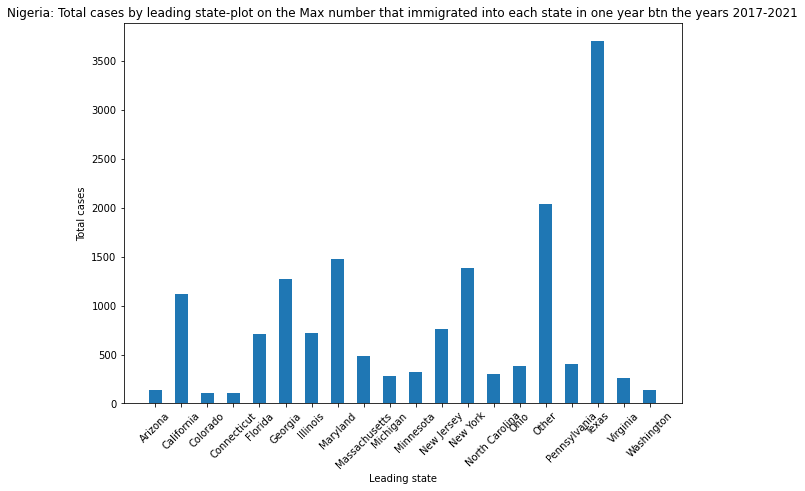

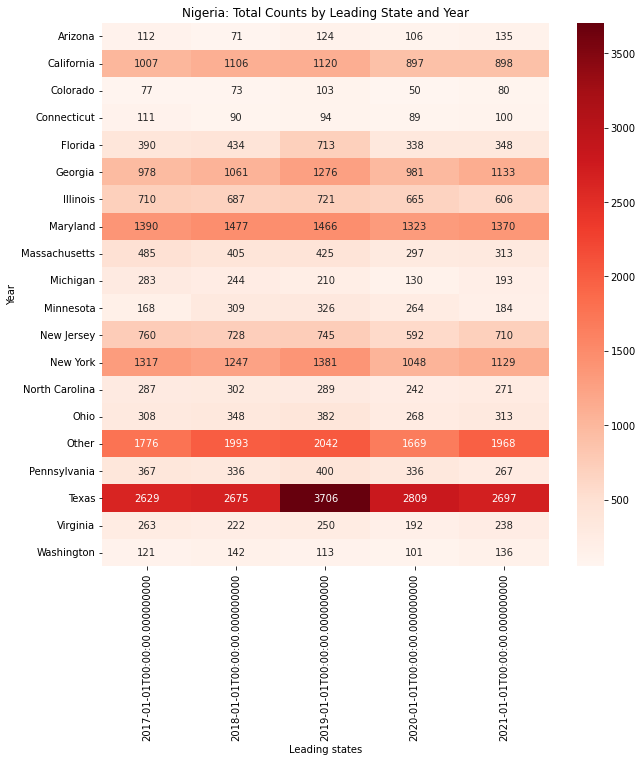

In [23]:
import plotly.express as px

fig = px.bar(
    nigeria_states17_21.query("Year==2017"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-NIGERIA:Total cases by leading states in 2017"  # chart title
)
fig.show()


fig = px.bar(
    nigeria_states17_21.query("Year==2018"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-NIGERIA:Total cases by leading states in 2018"  # chart title
)
fig.show()

fig = px.bar(
    nigeria_states17_21.query("Year==2019"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-NIGERIA:Total cases by leading states in 2019"  # chart title
)
fig.show()

fig = px.bar(
    nigeria_states17_21.query("Year==2020"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-NIGERIA:Total cases by leading states in 2020"  # chart title
)
fig.show()

fig = px.bar(
    nigeria_states17_21.query("Year==2021"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-NIGERIA:Total cases by leading states in 2021"  # chart title
)
fig.show()

import plotly.express as px

fig = px.line(
    nigeria_states17_21,  # data frame
    x="Year",  # column that contains the dates
    y="Total",  # column that contains the values
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-NIGERIA: Total cases by leading states over time"  # chart title
)
fig.show()

grouped_nigeria = nigeria_states17_21.groupby(['Leading states', 'Year'])['Total'].max()
grouped_nigeria


grouped_nigeriadf=grouped_nigeria.reset_index()
pd.set_option('display.max_rows', 100)
grouped_nigeriadf

import matplotlib.pyplot as plt

# Extract the leading states and total values from the dataframe
states = grouped_nigeriadf['Leading states']
totals = grouped_nigeriadf['Total']

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
plt.bar(states, totals, width=0.5)
# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)


# Add title and labels
plt.title('Nigeria: Total cases by leading state-plot on the Max number that immigrated into each state in one year btn the years 2017-2021')
plt.xlabel('Leading state')
plt.ylabel('Total cases')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
grouped_nigeria = grouped_nigeria.unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(grouped_nigeria, cmap='Reds', annot=True, fmt='.0f')

# Add a title and axis labels
plt.title('Nigeria: Total Counts by Leading State and Year')
plt.xlabel('Leading states')
plt.ylabel('Year')

# Show the plot
plt.show()

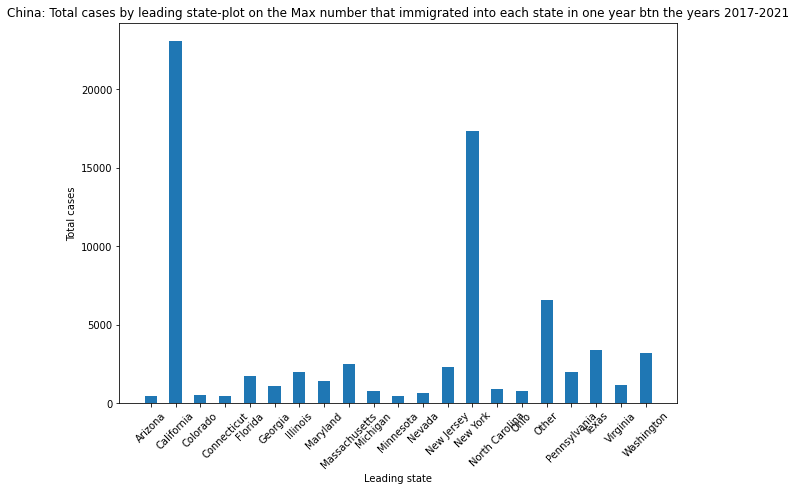

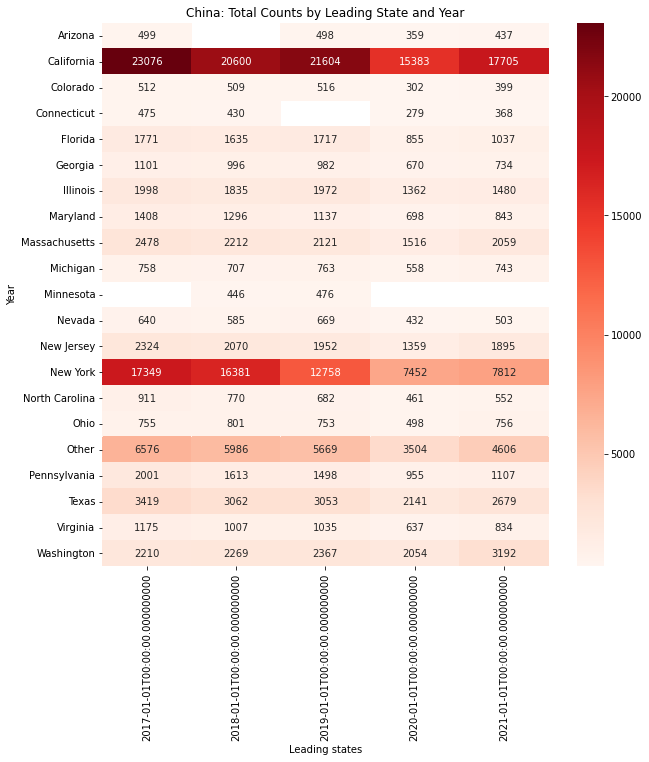

In [24]:
import plotly.express as px

fig = px.bar(
    china_states17_21.query("Year==2017"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-CHINA:Total cases by leading states in 2017"  # chart title
)
fig.show()


fig = px.bar(
    china_states17_21.query("Year==2018"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-CHINA:Total cases by leading states in 2018"  # chart title
)
fig.show()

fig = px.bar(
    china_states17_21.query("Year==2019"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-CHINA:Total cases by leading states in 2019"  # chart title
)
fig.show()

fig = px.bar(
    china_states17_21.query("Year==2020"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-CHINA:Total cases by leading states in 2020"  # chart title
)
fig.show()

fig = px.bar(
    china_states17_21.query("Year==2021"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-CHINA:Total cases by leading states in 2021"  # chart title
)
fig.show()

import plotly.express as px

fig = px.line(
    nigeria_states17_21,  # data frame
    x="Year",  # column that contains the dates
    y="Total",  # column that contains the values
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-CHINA: Total cases by leading states over time"  # chart title
)
fig.show()

grouped_china = china_states17_21.groupby(['Leading states', 'Year'])['Total'].max()
grouped_china


grouped_chinadf=grouped_china.reset_index()
pd.set_option('display.max_rows', 100)
grouped_chinadf

import matplotlib.pyplot as plt

# Extract the leading states and total values from the dataframe
states = grouped_chinadf['Leading states']
totals = grouped_chinadf['Total']

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
plt.bar(states, totals, width=0.5)
# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)


# Add title and labels
plt.title('China: Total cases by leading state-plot on the Max number that immigrated into each state in one year btn the years 2017-2021')
plt.xlabel('Leading state')
plt.ylabel('Total cases')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
grouped_china = grouped_china.unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(grouped_china, cmap='Reds', annot=True, fmt='.0f')

# Add a title and axis labels
plt.title('China: Total Counts by Leading State and Year')
plt.xlabel('Leading states')
plt.ylabel('Year')

# Show the plot
plt.show()

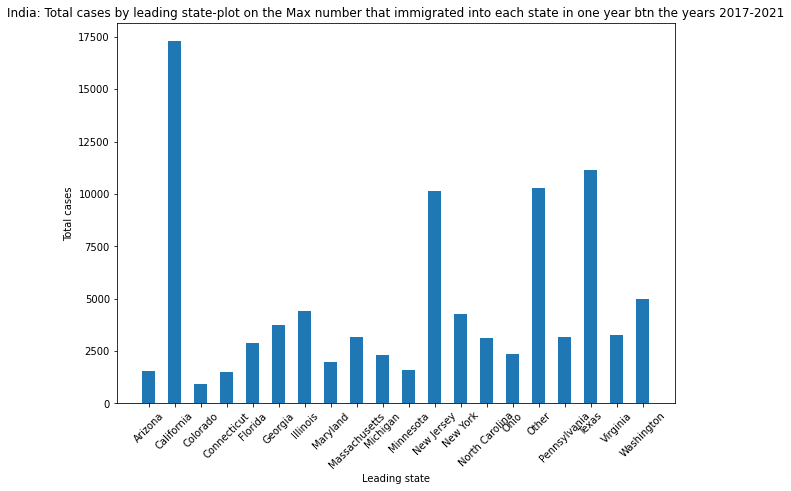

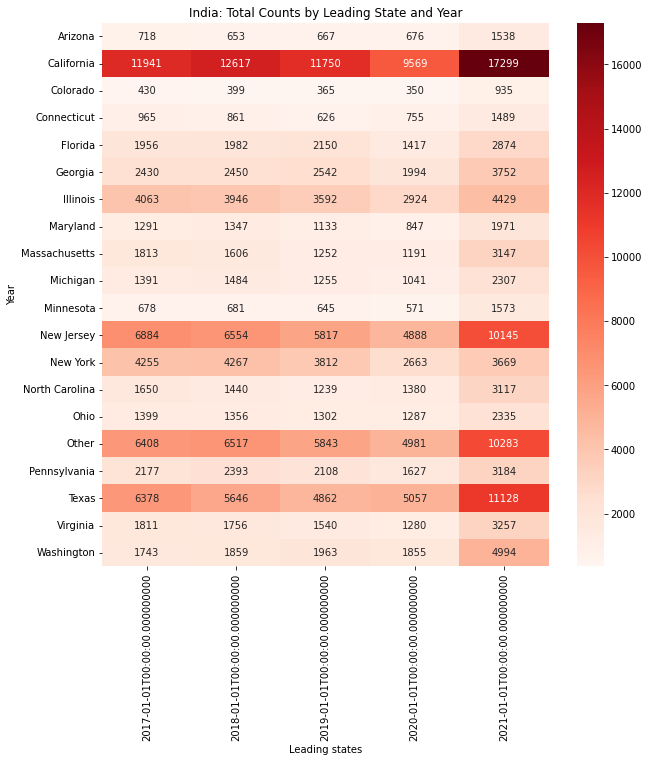

In [25]:
import plotly.express as px

fig = px.bar(
    india_states17_21.query("Year==2017"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-INDIA:Total cases by leading states in 2017"  # chart title
)
fig.show()


fig = px.bar(
    india_states17_21.query("Year==2018"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-INDIA:Total cases by leading states in 2018"  # chart title
)
fig.show()

fig = px.bar(
    india_states17_21.query("Year==2019"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-INDIA:Total cases by leading states in 2019"  # chart title
)
fig.show()

fig = px.bar(
    india_states17_21.query("Year==2020"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-INDIA:Total cases by leading states in 2020"  # chart title
)
fig.show()

fig = px.bar(
    india_states17_21.query("Year==2021"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-INDIA:Total cases by leading states in 2021"  # chart title
)
fig.show()

import plotly.express as px

fig = px.line(
    india_states17_21,  # data frame
    x="Year",  # column that contains the dates
    y="Total",  # column that contains the values
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-INDIA: Total cases by leading states over time"  # chart title
)
fig.show()

grouped_india = india_states17_21.groupby(['Leading states', 'Year'])['Total'].max()
grouped_india


grouped_indiadf=grouped_india.reset_index()
pd.set_option('display.max_rows', 100)
grouped_indiadf

import matplotlib.pyplot as plt

# Extract the leading states and total values from the dataframe
states = grouped_indiadf['Leading states']
totals = grouped_indiadf['Total']

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
plt.bar(states, totals, width=0.5)
# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)


# Add title and labels
plt.title('India: Total cases by leading state-plot on the Max number that immigrated into each state in one year btn the years 2017-2021')
plt.xlabel('Leading state')
plt.ylabel('Total cases')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
grouped_india = grouped_india.unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(grouped_india, cmap='Reds', annot=True, fmt='.0f')

# Add a title and axis labels
plt.title('India: Total Counts by Leading State and Year')
plt.xlabel('Leading states')
plt.ylabel('Year')

# Show the plot
plt.show()

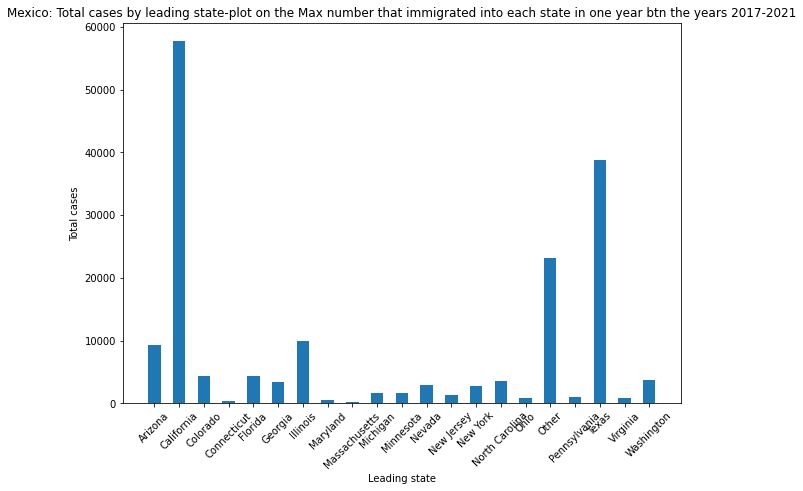

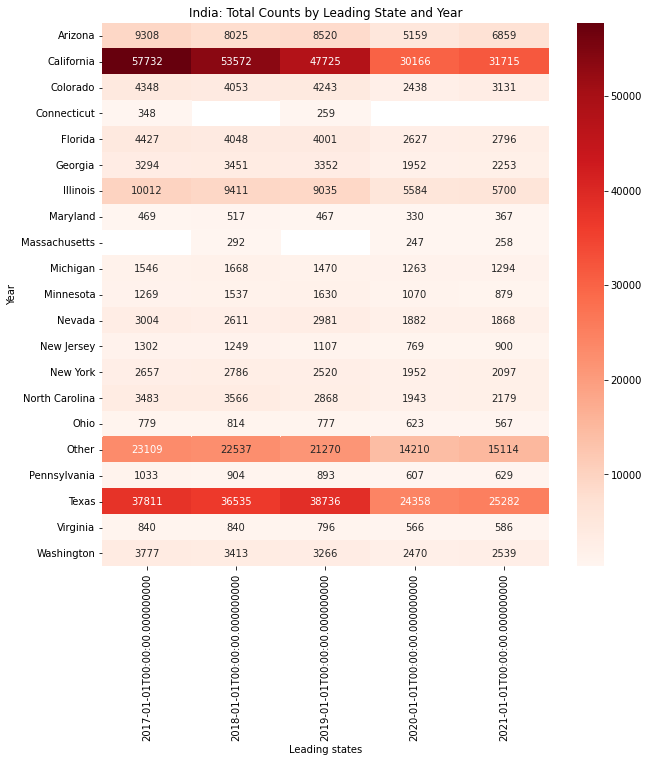

In [26]:
import plotly.express as px

fig = px.bar(
    mexico_states17_21.query("Year==2017"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-MEXICO:Total cases by leading states in 2017"  # chart title
)
fig.show()


fig = px.bar(
    mexico_states17_21.query("Year==2018"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-MEXICO:Total cases by leading states in 2018"  # chart title
)
fig.show()

fig = px.bar(
    mexico_states17_21.query("Year==2019"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-MEXICO:Total cases by leading states in 2019"  # chart title
)
fig.show()

fig = px.bar(
    mexico_states17_21.query("Year==2020"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-MEXICO:Total cases by leading states in 2020"  # chart title
)
fig.show()

fig = px.bar(
    mexico_states17_21.query("Year==2021"),  # filter data for year 2019
    x="Leading states",  # column for x-axis
    y="Total",  # column for y-axis
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-MEXICO:Total cases by leading states in 2021"  # chart title
)
fig.show()

import plotly.express as px

fig = px.line(
    mexico_states17_21,  # data frame
    x="Year",  # column that contains the dates
    y="Total",  # column that contains the values
    color="Leading states",  # color by Leading states
    title="COUNTRY OF ORIGIN-MEXICO: Total cases by leading states over time"  # chart title
)
fig.show()

grouped_mexico = mexico_states17_21.groupby(['Leading states', 'Year'])['Total'].max()
grouped_mexico


grouped_mexicodf=grouped_mexico.reset_index()
pd.set_option('display.max_rows', 100)
grouped_mexicodf

import matplotlib.pyplot as plt

# Extract the leading states and total values from the dataframe
states = grouped_mexicodf['Leading states']
totals = grouped_mexicodf['Total']

# Set the figure size
plt.figure(figsize=(10, 7))

# Create the bar plot
plt.bar(states, totals, width=0.5)
# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)


# Add title and labels
plt.title('Mexico: Total cases by leading state-plot on the Max number that immigrated into each state in one year btn the years 2017-2021')
plt.xlabel('Leading state')
plt.ylabel('Total cases')

# Show the plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
grouped_mexico = grouped_mexico.unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(grouped_mexico, cmap='Reds', annot=True, fmt='.0f')

# Add a title and axis labels
plt.title('India: Total Counts by Leading State and Year')
plt.xlabel('Leading states')
plt.ylabel('Year')

# Show the plot
plt.show()